In [7]:
%load_ext autoreload
%autoreload 2

In [ ]:
import mrcfile
import torch
import matplotlib.pyplot as plt 
import numpy as np

from cryosvd.analysis_code.io import load_methods_results
from cryosvd.analysis_code.svd_analysis import (
    compute_distance_matrix,
    compute_common_embedding,
    compute_distance_matrix_asymmetric
)
from cryosvd.analysis_code.power_spectrum_utils import compute_power_spectrums


In [ ]:
path_to_3dva_1 = "3dva_mode1/"
path_to_3dva_2 = "3dva_mode2/"

path_to_md_1 = "md_mode1/mode1/"
path_to_md_2 = "md_mode2/mode2"

path_to_3dflex_mode_1 ="3dflex_mode1/"
path_to_3dflex_mode_2 ="3dflex_mode2/"

path_to_cdrgn="cryodrgn/pc1/"
path_to_manifoldem="manifoldem/manifoldem_volumes/"

path_dictionary = {
    '3dva_mode1': path_to_3dva_1,
    '3dva_mode2': path_to_3dva_2,
    'md_mode1': path_to_md_1,
    'md_mode2': path_to_md_2,
    '3dflex_mode1': path_to_3dflex_mode_1,
    '3dflex_mode2': path_to_3dflex_mode_2,
    'cryodrgn': path_to_cdrgn,
    'manifoldem': path_to_manifoldem,
}

mask = mrcfile.open('./data/trpv1_dktx_mask.mrc').data.flatten()[None, ...]


mask = torch.tensor(mask)

In [10]:
methods_data = load_methods_results(paths_to_methods=path_dictionary, mask=mask, stride=1,pixel_size=1.22)

/home/mastore/Software/mamba/envs/cryosvd/lib/python3.10/site-packages/cryosvd/analysis_code/io.py:88: UserWarning: mask is a 2D tensor. Assuming the first dimension is the batch dimension.
  warn (
  0%|                                                                                                                                                                                                                    | 0/8 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '3dva_mode1/'

In [ ]:
#distance_matrix, dist_mtx_labels = compute_distance_matrix(methods_data)

distance_matrix, dist_mtx_labels = compute_asymmetric_distance_matrix(methods_data, do_sort_matrix=True)
common_embedding_results = compute_common_embedding(methods_data,sort_matrix = False)


NameError: name 'methods_data' is not defined

In [12]:
common_embedding = common_embedding_results["common_embedding"]

marker_list = ['x','.','3','+','v','D','1','s','2','o','4','5']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, method in enumerate(methods_data.keys()):
    print(method)
    if method == '3dflex_mode2' or method == 'md_mode1':
        if 'md_mode1' == method:
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i],s=90)

        else:   
            ax.scatter(common_embedding[method][:, 0], common_embedding[method][:, 1], label=method, marker=marker_list[i], color=color_list[i])

ax.legend()


NameError: name 'common_embedding_results' is not defined

NameError: name 'methods_data' is not defined

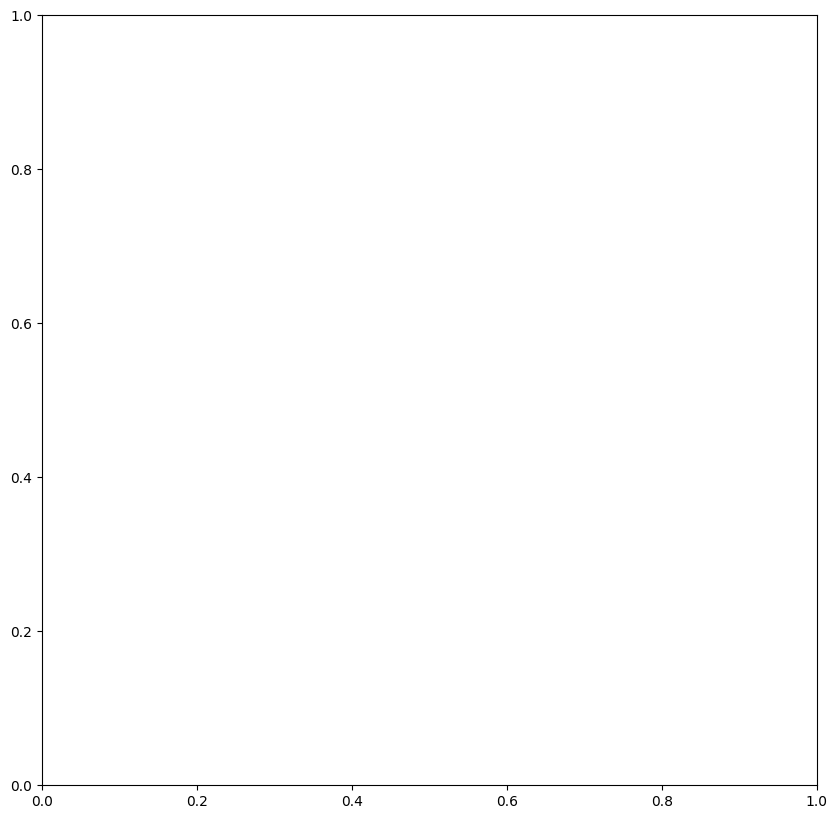

In [13]:
marker_list = ['x','.','3','+','v','D','1','s','2','o','4']
color_list = ['#1f77b4', '#bcbd22', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#ffff00', '#17becf', '#ff7f0e', '#2ca02c']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
pc1=0
pc2=1

for i, method in enumerate(methods_data.keys()):
    ax.scatter(common_embedding[method][:, pc1], common_embedding[method][:, pc2], marker=marker_list[i], color=color_list[i], label=method)
ax.legend()

plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

original_cmap = matplotlib.colormaps['magma_r']  # Get the original Magma colormap

lighter_cmap = truncate_colormap(original_cmap, maxval=0.5) 
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for (j,i),label in np.ndenumerate(distance_matrix):
    ax.text(i,j,format(label,'#1.2f'),ha='center',va='center')

ax.set_xticks(range(len(methods_data.keys())), dist_mtx_labels, rotation='vertical')
ax.set_yticks(range(len(methods_data.keys())), dist_mtx_labels)

im = ax.imshow(distance_matrix,cmap=lighter_cmap)
fig.colorbar(im, cmap=lighter_cmap, label="Proportion of Captured Variance", fraction=0.046, pad=0.04)

plt.tight_layout()


['3dva_mode1', '3dva_mode2', 'md_mode1', 'md_mode2', '3dflex_mode1', '3dflex_mode2', 'cryodrgn', 'manifoldem']
torch.Size([50, 96])


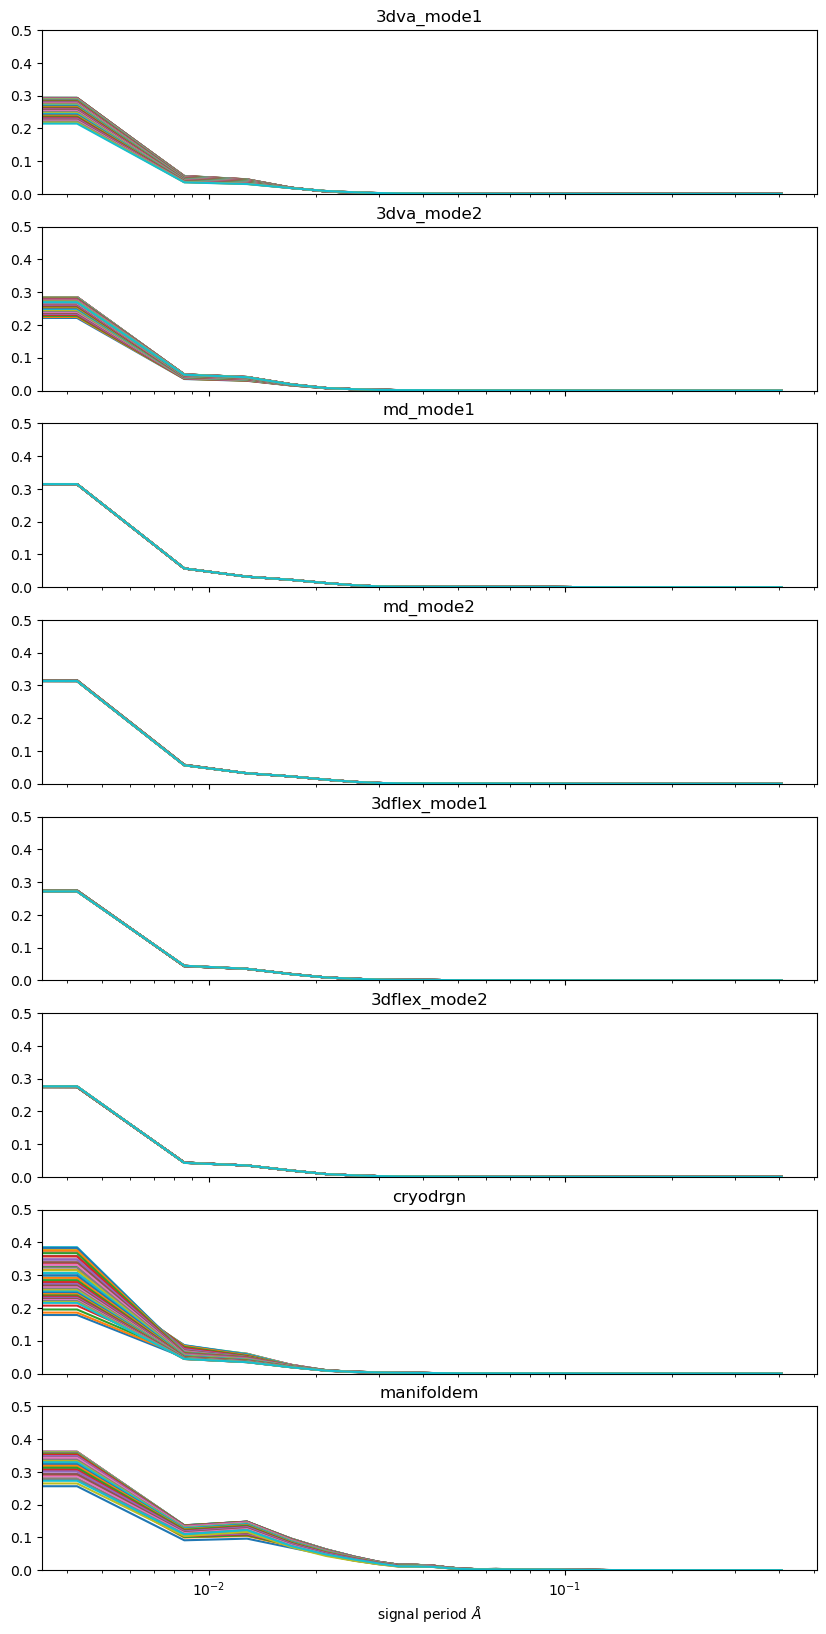

In [24]:
fig, axes = plt.subplots(len(methods_data.keys()), 1, figsize=(10, 20), sharex=True)

keys = list(power_spectrums.keys())

spec_shape = np.shape(power_spectrums[keys[0]]['power_spectrums'])
specs_normed = np.zeros([len(keys),spec_shape[0],spec_shape[1]])
# stacked_specs = torch.stack()

for i,method in enumerate(power_spectrums.keys()):
    specs_normed[i] = power_spectrums[method]['power_spectrums'] / np.mean((power_spectrums[method]['power_spectrums'][:,0].numpy()))


for i,method1 in enumerate(power_spectrums.keys()):
    for j in range(len(power_spectrums[method1]['power_spectrums'])):
        axes[i].semilogx(power_spectrums[method1]['frequencies'],np.array(specs_normed[i][j])) 

        # print(np.sum(specs[i][j]))
    axes[i].set_title(keys[i])

    axes[i].set_ylim([0,0.5])

axes[i].set_xlabel('signal period $\AA$') 

plt.show()

In [ ]:
vars = np.array([np.sum((np.std(specs_normed[i],axis=0))) for i in range(len(specs_normed))])/np.shape(specs_normed)[1]
fig = plt.figure(figsize=(10,10))
plt.yticks(fontsize=16)
plt.bar (methods_data.keys(), (vars)) 
plt.ylabel('Mean Power Spectrum Variance',fontsize=24)
plt.xlabel('Method')

plt.tight_layout()

plt.show()
